In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/kaggle/input/affel-ds2-credit-card/train.csv")
test = pd.read_csv("/kaggle/input/affel-ds2-credit-card/test.csv")

### 데이터 이해 및 탐색

In [3]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [5]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
train['Class'].value_counts(normalize=True) #불균형적이다
# 0  일반카드
# 1 비정상적인카드

Class
0    0.997893
1    0.002107
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>],
       [<Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>,
        <Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>],
       [<Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>, <A

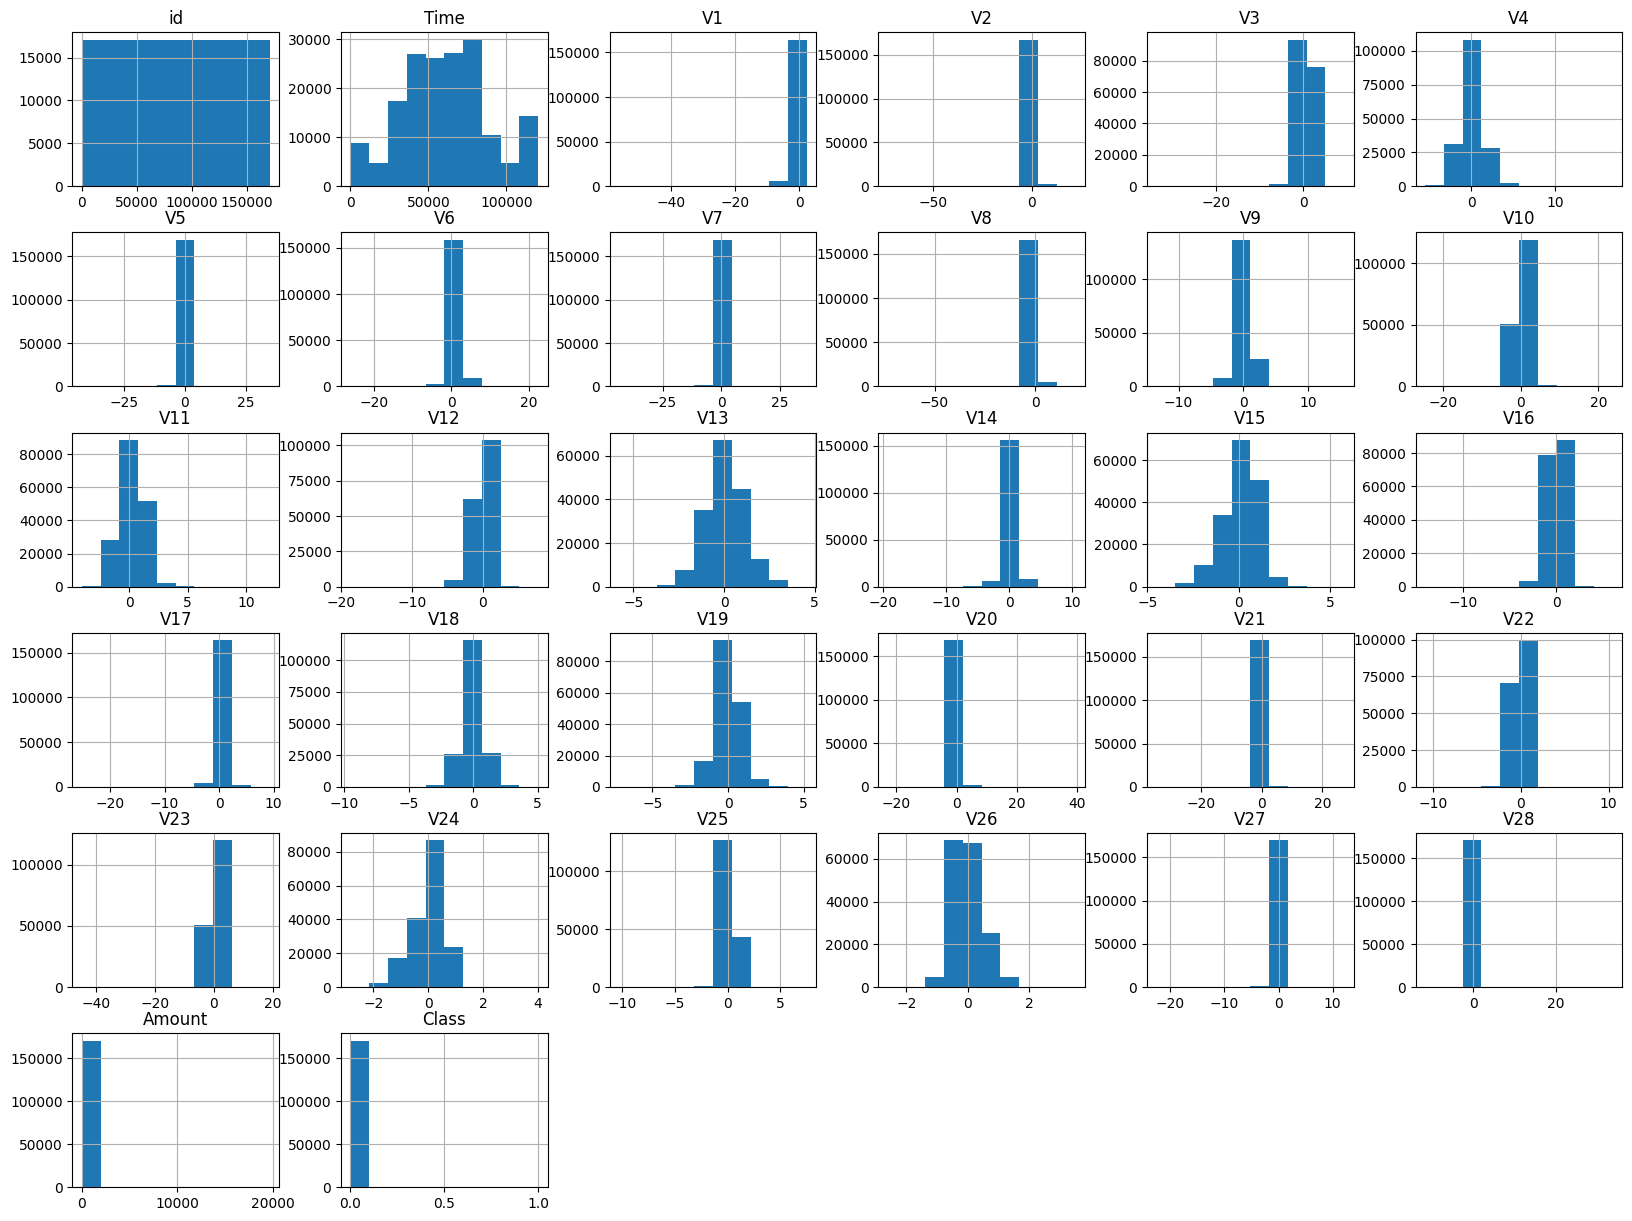

In [7]:
train.hist(bins = 10, figsize =(20, 15)) #id, time이 조금 이상하고 주성분 분석 V는 대부분 0근처에 분

<Axes: >

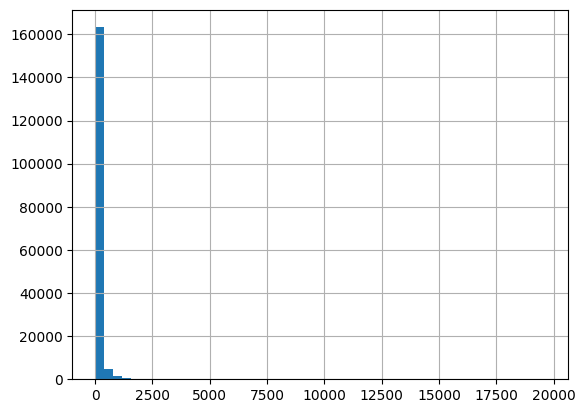

In [8]:
train['Amount'].hist(bins = 50)   # 대부분 소액 결제
# x축이 20000까지 그려졌으므로 저기에 무언가 이상값이 있다는 것을 알 수 있다.

In [9]:
train['Amount'].describe() #max 19656 ,75%가 76인 것을 볼때 이상값으로 판단
# 그러나 신용카드 이상 거래 탐지 이므로 이상값을 고려해봐야함 
# 편차가 심해서 스케일링 해야함(데이터 전처리)

count    170883.000000
mean         87.336704
std         245.954429
min           0.000000
25%           5.480000
50%          21.890000
75%          76.720000
max       19656.530000
Name: Amount, dtype: float64

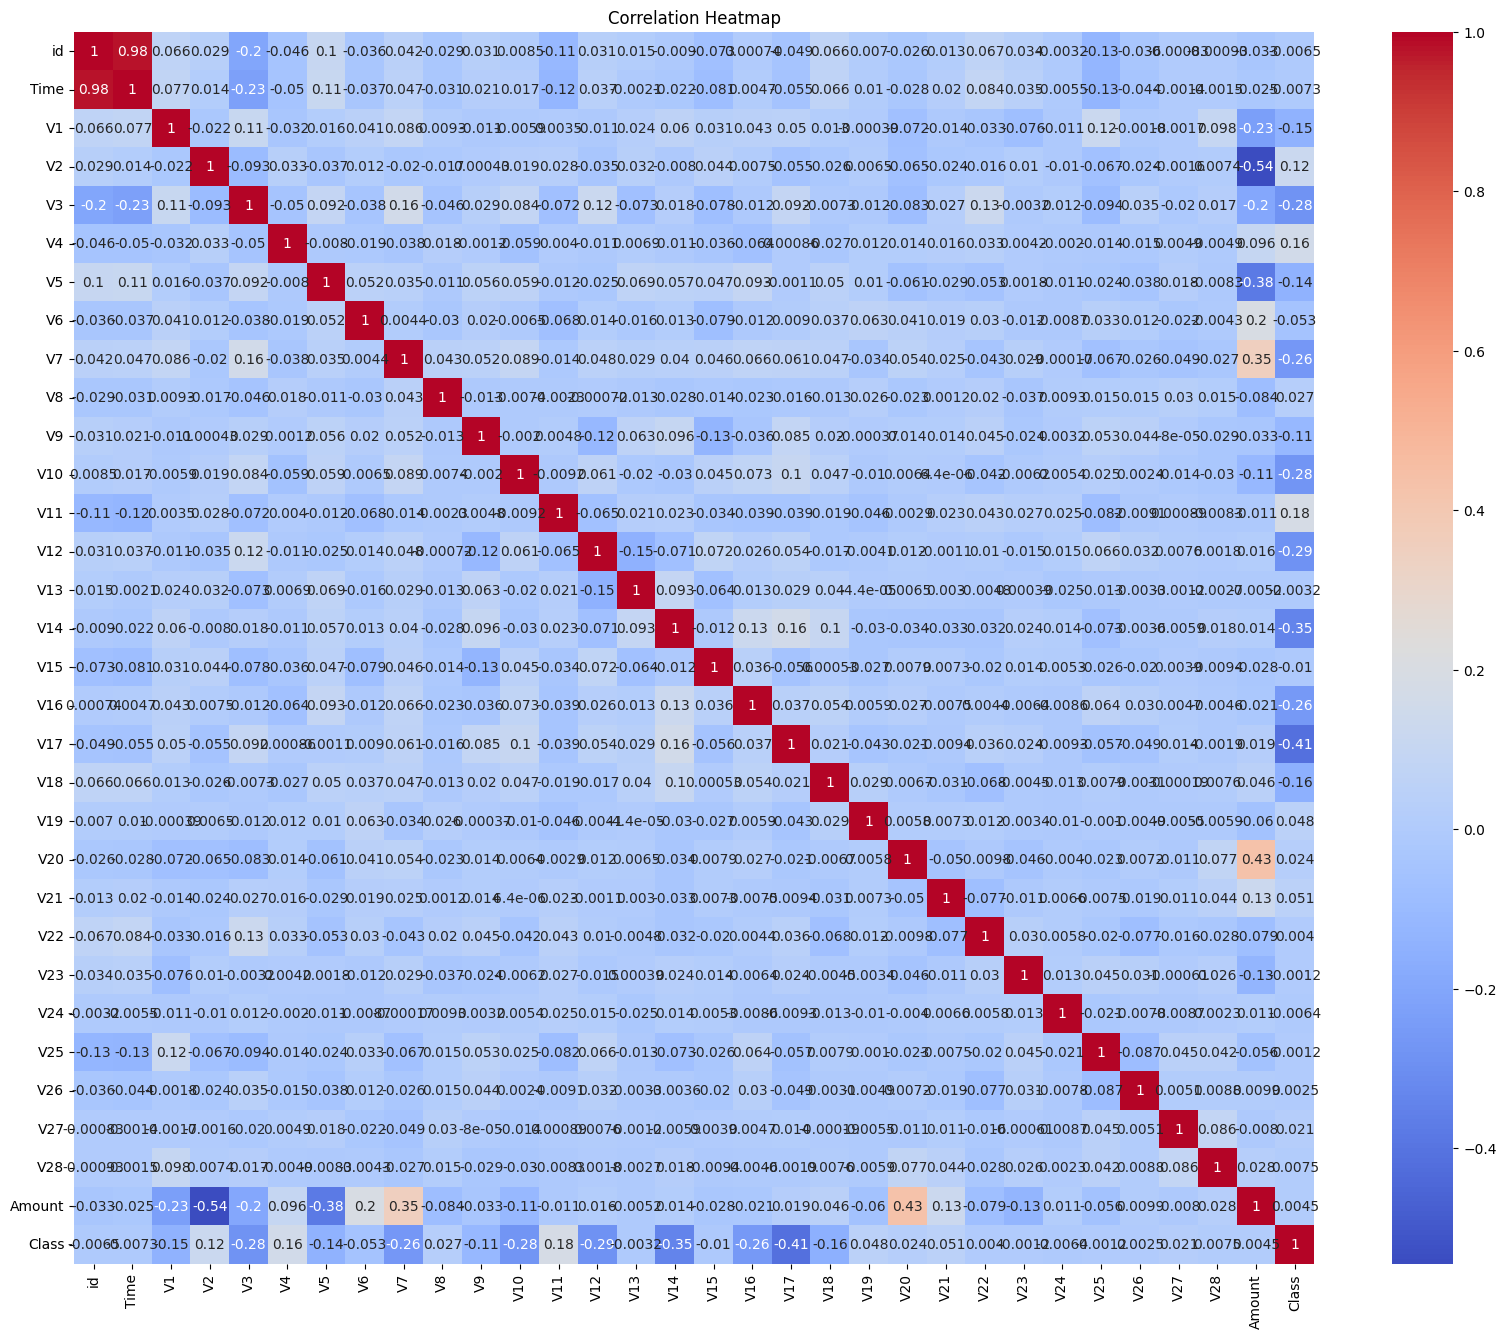

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()                         
#위에서 id, time이 이상했는데 상관관계를 그려보니 0.98로 처리를 해줘야 한다는 것을 알 수 있다. 

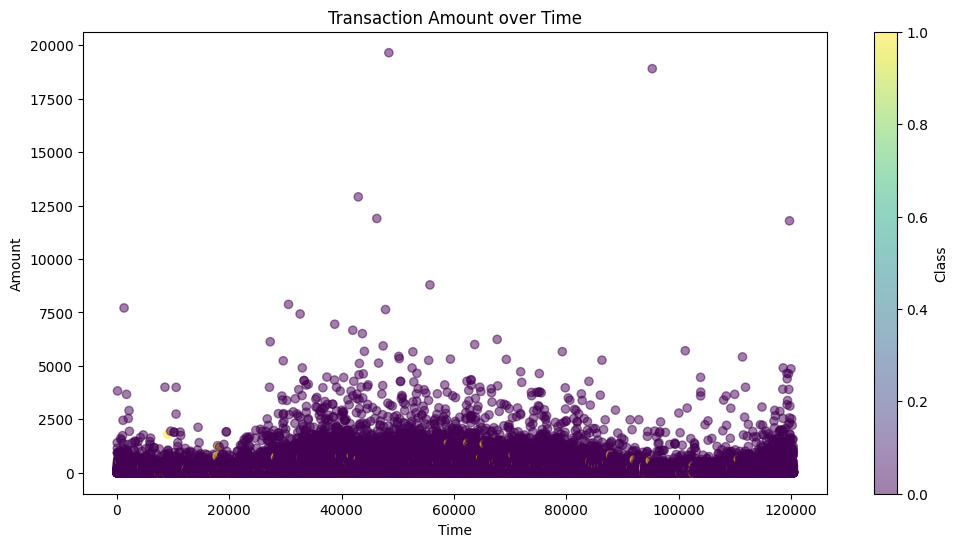

In [11]:
# 시간이라는 변수가 중요할까봐 시간에 따른 거래 및 사기거래 비율을 구현했는데, 별상관없는 것을 확인
# 삭제해도 상관없을 것이라 판단 (id, Time 삭제)
plt.figure(figsize=(12,6))
plt.scatter(train['Time'], train['Amount'], c=train['Class'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.colorbar(label='Class')
plt.show()

### 데이터 전처리

In [12]:
train.isnull().sum().sum() #결측치 0

0

In [13]:
def get_preprocessed_df(df):
    df_copy = df.copy()
    df_copy.drop(['id','Time'], axis=1, inplace=True)
    ss = StandardScaler()
    df_copy['Amount'] = ss.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    outlier_index = get_outlier(train, 'V17', 1)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    return df_copy

#id, 시간 삭제하는 함수
#Amount 컬럼을 StandardScaler 적용
#데이터 이상치 제거

In [14]:
# df['Amount_log'] = np.log(df['Amount'] + 1)
# 피쳐엔지니어링을 생각했지만 scaling만 하는게 더 좋아보여서 주석처리

### 스케일링, 이상치 제거 (get_preprocessed_df)함수 구현

In [15]:
train['Amount'].describe() #스케일링

count    170883.000000
mean         87.336704
std         245.954429
min           0.000000
25%           5.480000
50%          21.890000
75%          76.720000
max       19656.530000
Name: Amount, dtype: float64

In [16]:
train.corr()['Class'].sort_values() # 이상치를 제거하기 위해 class와 가장 높은 상관관계 주성분 추출

V17      -0.412954
V14      -0.345635
V12      -0.287091
V3       -0.281337
V10      -0.275925
V7       -0.263719
V16      -0.256496
V18      -0.156770
V1       -0.145423
V5       -0.143884
V9       -0.114938
V6       -0.053041
V15      -0.010299
Time     -0.007334
id       -0.006452
V24      -0.006353
V13      -0.003224
V25      -0.001201
V23      -0.001187
V26       0.002472
V22       0.003981
Amount    0.004528
V28       0.007481
V27       0.021196
V20       0.023689
V8        0.026687
V19       0.048401
V21       0.050751
V2        0.124537
V4        0.159813
V11       0.181917
Class     1.000000
Name: Class, dtype: float64

In [17]:
# 이상치 제거
def get_outlier(df, columns, weight):
    fraud = train[train['Class'] == 1][columns]
    q1 = fraud.quantile(0.25)
    q3 = fraud.quantile(0.75)
    iqr = q3 - q1
    iqr_weight = iqr * weight
    
    lowest = q1 - iqr_weight
    highest = q3 + iqr_weight
    return fraud[(fraud < lowest) | (fraud > highest)].index

In [18]:
def get_train_test_dataset(df):
    df_copy = get_preprocessed_df(df)  #전처리 프레임 반환
    X_features = df_copy.drop('Class', axis =1)
    y_target = df_copy['Class']
    return train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

In [19]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [20]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/len(y_train))
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/len(y_test))

학습 데이터 레이블 값 비율
Class
0    0.997927
1    0.002073
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    0.997932
1    0.002068
Name: count, dtype: float64


In [21]:
#평가 지표 출력함수 정의
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return accuracy, precision, recall, f1, roc_auc

### 모델 선택 및 비교

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[51151     7]
 [   43    63]]
정확도: 0.9990, 정밀도: 0.9000, 재현율: 0.5943,    F1: 0.7159, AUC:0.9891


(0.9990246566791511,
 0.9,
 0.5943396226415094,
 0.7159090909090909,
 0.9891167725293523)

In [23]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth =3, n_jobs = -1, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

오차 행렬
[[51157     1]
 [   18    88]]
정확도: 0.9996, 정밀도: 0.9888, 재현율: 0.8302,    F1: 0.9026, AUC:0.9849


(0.9996293695380774,
 0.9887640449438202,
 0.8301886792452831,
 0.9025641025641026,
 0.9848899487861136)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

오차 행렬
[[51153     5]
 [   32    74]]
정확도: 0.9993, 정밀도: 0.9367, 재현율: 0.6981,    F1: 0.8000, AUC:0.9724


(0.9992782459425718,
 0.9367088607594937,
 0.6981132075471698,
 0.7999999999999999,
 0.9724421086873298)

In [25]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    n_jobs=-1,
    random_state=42)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

[LightGBM] [Info] Number of positive: 248, number of negative: 119365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 119613, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002073 -> initscore=-6.176513
[LightGBM] [Info] Start training from score -6.176513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

(0.9975811485642946,
 0.45263157894736844,
 0.8113207547169812,
 0.581081081081081,
 0.9072272950909761)

- 기본적인 로지스틱회귀, Xgboost, RandomForest, LightGBM 방법을 통해 학습을 진행
- 같은 조건으로 비교하기 위해 random_state=42를 사용
- 불균형 데이터에서는 혼동행렬을 통한 분석이 의미가 없다.
- 재현율, 정밀도, F1 score가 제대로 반영되지 못한 것을 알 수 있다. 즉 평가지표로 의미가 퇴색 
- SMOTE를 사용하여 클래스 불균형을 처리.

### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [26]:
train['Class'].value_counts()

Class
0    170523
1       360
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


In [30]:
results = {}

for name, model in models.items():
    print(f"\n{name} 모델을 학습하고 평가합니다...")
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy, precision, recall, f1, roc_auc = get_clf_eval(y_test, y_pred, y_pred_proba)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': roc_auc
    }


Logistic Regression 모델을 학습하고 평가합니다...
오차 행렬
[[50064  1094]
 [   11    95]]
정확도: 0.9784, 정밀도: 0.0799, 재현율: 0.8962,    F1: 0.1467, AUC:0.9839

XGBoost 모델을 학습하고 평가합니다...
오차 행렬
[[51144    14]
 [   15    91]]
정확도: 0.9994, 정밀도: 0.8667, 재현율: 0.8585,    F1: 0.8626, AUC:0.9779

Random Forest 모델을 학습하고 평가합니다...
오차 행렬
[[51151     7]
 [   17    89]]
정확도: 0.9995, 정밀도: 0.9271, 재현율: 0.8396,    F1: 0.8812, AUC:0.9804

LightGBM 모델을 학습하고 평가합니다...
[LightGBM] [Info] Number of positive: 119365, number of negative: 119365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 238730, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
오차 행렬
[[51130    28]
 [   15    91]]
정확도: 0.9992, 정밀도: 0.7647, 재현율: 0.8585,    F1: 0.8089, AUC:0.9731


- 모델을 평가하는데 있어서 AUC를 통해 정확도를 평가하는 것이 중요하고 영향력이 있기 때문에 수치가 낮은 XGBoost, LightGBM 모델을 하이퍼 파라미터 튜닝을 하겠다.
- 그 후 개선된 두 모델을 반영하여 앙상블을 하고 나머지와 비교해서 어떤 모델이 가장 좋은지 판별해 보겠다.

In [31]:
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

### XGB 하이퍼파라미터 튜닝

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_params = {
    'n_estimators': [100, 200],  # 범위 축소
    'max_depth': [3, 4],  # 범위 축소
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_random = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_distributions=xgb_params, n_iter=5, cv=2,  # n_iter 및 cv 감소
                                scoring='roc_auc', n_jobs=-1, random_state=42)
xgb_random.fit(X_train_resampled, y_train_resampled)
print("Best XGBoost parameters:", xgb_random.best_params_)


Best XGBoost parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


### LightGBM 하이퍼파라미터 튜닝

In [33]:
lgbm_params = {
    'n_estimators': [100, 200],  # 범위 축소
    'max_depth': [3, 4],  # 범위 축소
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
lgbm_random = RandomizedSearchCV(LGBMClassifier(), param_distributions=lgbm_params, n_iter=5, cv=2,  # n_iter 및 cv 감소
                                 scoring='roc_auc', n_jobs=-1, random_state=42)
lgbm_random.fit(X_train_resampled, y_train_resampled)
print("Best LightGBM parameters:", lgbm_random.best_params_)


[LightGBM] [Info] Number of positive: 59682, number of negative: 59683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 119365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499996 -> initscore=-0.000017
[LightGBM] [Info] Start training from score -0.000017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

### 앙상블

In [34]:
from sklearn.ensemble import VotingClassifier
tuned_xgb = XGBClassifier(**xgb_random.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
tuned_lgbm = LGBMClassifier(**lgbm_random.best_params_, random_state=42)
ensemble = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('xgb', tuned_xgb),
    ('lgbm', tuned_lgbm)
], voting='soft')

ensemble.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 119365, number of negative: 119365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 238730, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(max_depth=3, n_estimators=200,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

In [35]:
ensemble.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 59683, number of negative: 59682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 119365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000017
[LightGBM] [Info] Start training from score 0.000017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(max_depth=3, n_estimators=200,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

### 성능 평가

In [36]:
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost (tuned)': tuned_xgb,
    'LightGBM (tuned)': tuned_lgbm,
    'Ensemble': ensemble
}

results = {}

for name, model in models.items():
    if name != 'Ensemble':
        model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = auc
    print(f"{name} - AUC: {auc:.4f}")

# 결과 비교
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['AUC'])
print("\n모델 비교:")
print(df_results)

best_model = df_results['AUC'].idxmax()
print(f"\n최고 성능 모델: {best_model}")

Logistic Regression - AUC: 0.9839
Random Forest - AUC: 0.9804
XGBoost (tuned) - AUC: 0.9790
[LightGBM] [Info] Number of positive: 119365, number of negative: 119365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 238730, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM (tuned) - AUC: 0.9780
Ensemble - AUC: 0.9868

모델 비교:
                          AUC

### test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


train = pd.read_csv("/kaggle/input/affel-ds2-credit-card/train.csv")
test = pd.read_csv("/kaggle/input/affel-ds2-credit-card/test.csv")


common_features = list(set(train.columns) & set(test.columns))
common_features.remove('id')  
if 'Class' in common_features:
    common_features.remove('Class')  


def get_outlier(df, column, threshold):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

def fit_preprocessor(train_df):
    ss = StandardScaler()
    ss.fit(train_df[['Amount']])
    
    outlier_index = get_outlier(train_df, 'V17', 1)
    
    return ss, outlier_index

def preprocess_data(df, ss, common_features, is_train=True, outlier_index=None):
    df_copy = df[common_features + ['Class'] if is_train else common_features].copy()
    
    df_copy['Amount'] = ss.transform(df_copy[['Amount']])
    
    if is_train and outlier_index is not None:
        df_copy = df_copy.drop(outlier_index)
    
    return df_copy


ss, outlier_index = fit_preprocessor(train)


train_preprocessed = preprocess_data(train, ss, common_features, is_train=True, outlier_index=outlier_index)
X_train = train_preprocessed[common_features]
y_train = train_preprocessed['Class']


test_ids = test['id']
X_test = preprocess_data(test, ss, common_features, is_train=False)


rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', lr), ('svm', svm)],
    voting='soft'
)

ensemble.fit(X_train, y_train)


y_pred_proba = ensemble.predict_proba(X_test)[:, 1]


results_df = pd.DataFrame({
    'id': test_ids,
    'predicted_probability': y_pred_proba
})


results_df.to_csv('submission.csv', index=False)
print("Predictions have been saved to 'submission.csv'")

# 회고

하이퍼파라미터 튜닝을 하다가 결국 커널이 터졌는지 아예 동작을 하지 않았다. 아쉽지만 앙상블 결과값이 잘 나와서 다행이다.
\만드는 것보다 test하는 걸 구현하는 것이 더 어려웠다.